# Modelling Latency

## Import Libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import accumulate

## Generate Data

       Bytes            SourceIP       ICMPSeq       TTL           Time
0   64 bytes   from 192.168.4.2:    icmp_seq=1   ttl=255   time=1042 ms
1   64 bytes   from 192.168.4.2:    icmp_seq=2   ttl=255   time=40.0 ms
2   64 bytes   from 192.168.4.2:    icmp_seq=3   ttl=255   time=14.0 ms
3   64 bytes   from 192.168.4.2:    icmp_seq=4   ttl=255   time=13.0 ms
4   64 bytes   from 192.168.4.2:    icmp_seq=5   ttl=255   time=17.1 ms
5   64 bytes   from 192.168.4.2:    icmp_seq=6   ttl=255   time=16.1 ms
6   64 bytes   from 192.168.4.2:    icmp_seq=7   ttl=255   time=15.0 ms
7   64 bytes   from 192.168.4.2:    icmp_seq=8   ttl=255   time=14.1 ms
8   64 bytes   from 192.168.4.2:    icmp_seq=9   ttl=255   time=13.4 ms
9   64 bytes   from 192.168.4.2:   icmp_seq=10   ttl=255   time=17.1 ms
10  64 bytes   from 192.168.4.2:   icmp_seq=11   ttl=255   time=16.0 ms
11  64 bytes   from 192.168.4.2:   icmp_seq=12   ttl=255   time=15.0 ms
12  64 bytes   from 192.168.4.2:   icmp_seq=13   ttl=255   time=

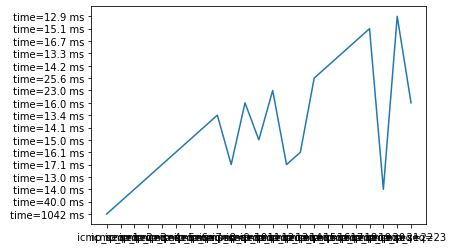

In [38]:
# df = pd.DataFrame()
# df['x1'] = np.random.uniform(-1,1, size=1000)
# df['x2'] = df['x1'] + np.random.uniform(-1,1, size=1000)
# df['x3'] = df['x2'] + np.random.uniform(-1,1, size=1000)
# df['x4'] = df['x3'] + np.random.uniform(-1, 1, size=1000)

columnNames = ['Bytes', 'SourceIP', 'ICMPSeq', 'TTL', 'Time']
# df = pd.read_csv('endtoend1.csv', on_bad_lines='skip', usecols=columns)
df = pd.read_csv('endtoend1.csv', names=columnNames)
print(df.to_string())

# Initial Plot
plt.plot(df.ICMPSeq, df.Time)
plt.show()

## Start Plot

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

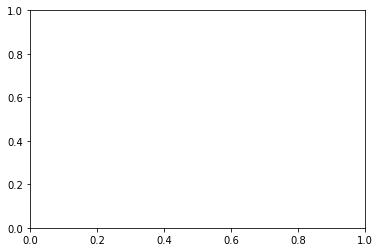

In [39]:
fig,ax = plt.subplots()

for col in df.columns:

  # SKIP IF IT HAS ANY INFINITE VALUES
  if not all(np.isfinite(df[col].values)):
    continue

  # USE numpy's HISTOGRAM FUNCTION TO COMPUTE BINS
  xh, xb = np.histogram(df[col], bins=60, normed=True)

  # COMPUTE THE CUMULATIVE SUM WITH accumulate
  xh = list(accumulate(xh))
  # NORMALIZE THE RESULT
  xh = np.array(xh) / max(xh)

  # PLOT WITH LABEL
  ax.plot(xb[1:], xh, label=f"$CDF$({col})")
ax.legend()
plt.title("CDFs of Columns")
plt.show()